# Pymaceuticals Inc.
---
 

In [20]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data = pd.merge(mouse_metadata, study_results, on='Mouse ID')

# Display the data table for preview
merged_data

print("Sample of merged_data DataFrame:")
print(merged_data.head())

Sample of merged_data DataFrame:
  Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1  


In [21]:
# Checking the number of mice.
num_mice = merged_data['Mouse ID'].nunique()

# Display Number of Mice
num_mice

249

In [22]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mice = merged_data[merged_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_mice_ids = duplicate_mice['Mouse ID'].unique()

# Diplay Mice Duplicates
duplicate_mice_ids

array(['g989'], dtype=object)

In [39]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_id = 'g989'  

full_data_for_duplicate_mouse = merged_data[merged_data['Mouse ID'] != duplicate_mouse_id]

# Display all of the data for Duplicate Mouse ID
full_data_for_duplicate_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [50]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
duplicate_mouse_id = 'g989'

# Drop specificed Mouse ID
df_remove = cleaned_data.loc[cleaned_data['Mouse ID'] != duplicate_mouse_id, :]
df_remove_unique = df_remove.groupby('Mouse ID')['Mouse ID'].count()
print(len(df_remove_unique))

248


In [51]:
#Display New Results of Cleaned Data

df_remove

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary Statistics

In [52]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_stats = df_remove.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

# Rename the Columns Readaiblity
summary_stats.columns = ['Mean', 'Median', 'Variance', 'Std Deviation', 'SEM']

# Display the summary stats table
print("Summary Statistics of Tumor Volume for Each Drug Regimen:")
summary_stats

Summary Statistics of Tumor Volume for Each Drug Regimen:


,Mean,Median,Variance,Std Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [55]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

summary_stats = df_remove.groupby('Drug Regimen').agg({
    'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']
})

# Flatten the multi-level columns for better readability
summary_stats.columns = ['Mean', 'Median', 'Variance', 'Std Deviation', 'SEM']

# Display the summary statistics table
print("Summary Statistics of Tumor Volume for Each Drug Regimen:")
summary_stats


Summary Statistics of Tumor Volume for Each Drug Regimen:


,Mean,Median,Variance,Std Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

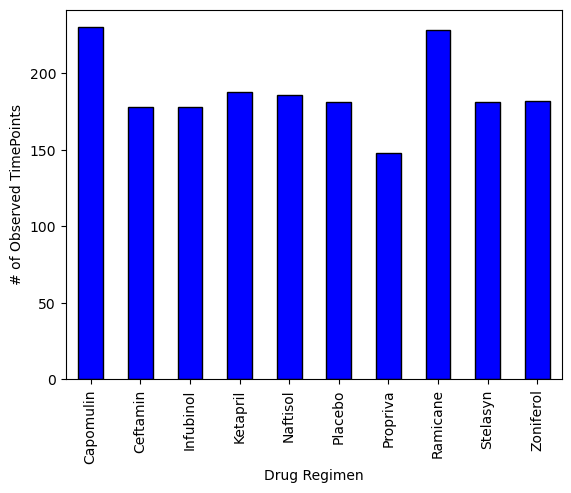

In [56]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

import pandas as pd
import matplotlib.pyplot as plt

# Group by 'Drug Regimen' and Count Rows by Group
counts_per_regimen = df_remove.groupby('Drug Regimen').size()

# Create Bar Plot
counts_per_regimen.plot(kind='bar', color='blue', edgecolor='black')

# Determine Plot Labels
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed TimePoints')

# Display Bar Graph
plt.show()

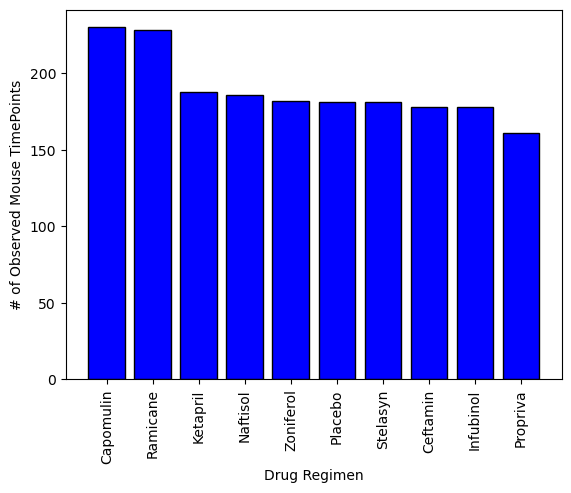

In [70]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
import matplotlib.pyplot as plt

# Group Data by 'Drug Regimen' and Count Rows by Group
counts_per_regimen = merged_data.groupby('Drug Regimen').size().sort_values(ascending = False)

# Create a Bar Plot
plt.bar(counts_per_regimen.index, counts_per_regimen, color='blue', edgecolor='black')

# Create Labels
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse TimePoints')


# Rotate Label for Visibility
plt.xticks(rotation='vertical')

# Display the Bar Plot
plt.show()

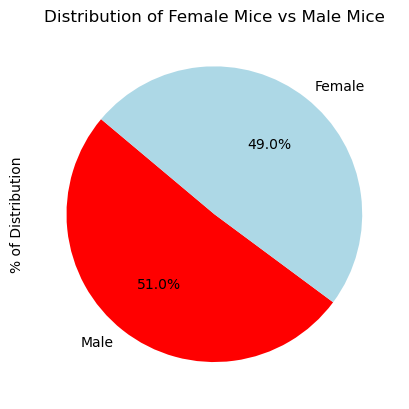

In [74]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
import pandas as pd

# Group the data by 'Sex' and Cound # of Mice by Gender
gender_distribution = df_remove['Sex'].value_counts()

# Create Pie Plot
gender_distribution.plot(kind='pie', autopct='%1.1f%%', colors=['red', 'lightblue'], startangle=140)

# Determine Plot Title & Labels
plt.title('Distribution of Female Mice vs Male Mice')
plt.ylabel('% of Distribution')

# Display Pie Chart
plt.show()

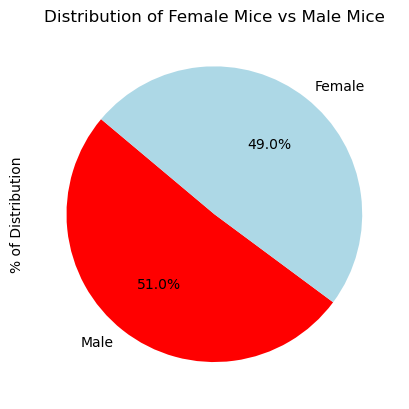

In [73]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
import matplotlib.pyplot as plt

# Group the data by 'Sex' and Count Number of Mice Per Gender
gender_distribution = df_remove['Sex'].value_counts()

# Create a Pie Chart
gender_distribution.plot(kind='pie', autopct='%1.1f%%', colors=['red', 'lightblue'], startangle=140)

# Set Plot Titles
plt.title('Distribution of Female Mice vs Male Mice')
plt.ylabel('% of Distribution')

# Display Pie Chart
plt.show()

## Quartiles, Outliers and Boxplots

In [68]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

# List of Specific Regiements
specific_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Filter the DataFrame down to Specific Regiments
filtered_df = df_remove[df_remove['Drug Regimen'].isin(specific_regimens)]

# Group filtered data by Mouse ID
grouped_df = filtered_df.groupby('Mouse ID')

# Calculate Final Total Volume by Mouse
final_tumor_volumes = grouped_df['Tumor Volume (mm3)'].last()

# Display Results
final_tumor_volumes


Mouse ID
a203    67.973419
a251    65.525743
a275    62.999356
a411    38.407618
a444    43.047543
          ...    
y769    68.594745
y793    31.896238
y865    64.729837
z578    30.638696
z581    62.754451
Name: Tumor Volume (mm3), Length: 100, dtype: float64

In [69]:
# Merge Grouped DataFrame with the original DataFrame
# This would then get the Tumor Volume at the Last TimePoint.
final_tumor_df = final_tumor_volumes.reset_index(name='Final Tumor Volume (mm3)')

# Merge the Original DataFrame with Final Tumor Volumes DataFrame on 'Mouse ID'
merged_data_tumor = pd.merge(merged_data, final_tumor_df, on='Mouse ID', how='left')

# Display the new, merged, updated Data Frame
merged_data_tumor

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Final Tumor Volume (mm3)
0,k403,Ramicane,Male,21,16,0,45.000000,0,22.050126
1,k403,Ramicane,Male,21,16,5,38.825898,0,22.050126
2,k403,Ramicane,Male,21,16,10,35.014271,1,22.050126
3,k403,Ramicane,Male,21,16,15,34.223992,1,22.050126
4,k403,Ramicane,Male,21,16,20,32.997729,1,22.050126
...,...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2,NaN
1889,z969,Naftisol,Male,9,30,30,65.841013,3,NaN
1890,z969,Naftisol,Male,9,30,35,69.176246,4,NaN
1891,z969,Naftisol,Male,9,30,40,70.314904,4,NaN


In [75]:
# Put treatments into a list for for loop (and later for plot labels)
unique_treatments = merged_data_tumor['Drug Regimen'].unique()
treatments = []
for treatment in unique_treatments:
    treatments.append(treatment)

print("List of Treatments:", treatments)


List of Treatments: ['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin', 'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol']


In [76]:
# Create Empty List to Store Volume Data
tumor_vol_data = []

# Continue unique treatments for Tumor Volumes
for treatment in unique_treatments:
    treatment_rows = merged_data_tumor[merged_data_tumor['Drug Regimen'] == treatment]
    tumor_volumes = treatment_rows['Tumor Volume (mm3)']
    tumor_vol_data.append(tumor_volumes.values)

# Print List
for treatment, tumor_volumes in zip(unique_treatments, tumor_vol_data):
    print(f"Treatment: {treatment}")
    print(tumor_volumes)
    print()


Treatment: Ramicane
[45.         38.82589807 35.01427146 34.22399174 32.99772858 33.46457735
 31.09949753 26.54699343 24.36550471 22.05012627 45.         45.85153062
 40.17055848 40.67812852 41.211897   35.56939935 34.95258284 30.96039194
 31.36940573 29.12847181 45.         38.71187185 34.8509979  35.27690634
 35.92865083 36.33856894 35.47402235 35.8461407  32.79817119 30.27623175
 45.         42.99887638 43.74822357 39.89743533 36.71229535 37.44444543
 37.96993365 38.62753581 35.1145752  30.56462509 45.         42.18878662
 42.95211843 38.68851607 36.89001635 37.41411419 37.81593487 38.50482444
 34.02209336 30.63869575 45.         44.01490022 44.49716216 45.25253427
 42.16834132 37.86066936 34.75724046 35.17014843 31.00186078 31.56046955
 45.         45.52187471 40.3751382  36.94027399 37.4788685  33.20500824
 33.817758   34.48752204 34.95473311 31.09533505 45.         45.5786783
 46.28799223 46.94094512 43.1263114  43.6022673  44.11827028 37.80238546
 32.83318858 33.39765251 45.    

In [82]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
df_remove['Tumor Volume (mm3)']([0.25, 0.5, 0.75])


TypeError: 'Series' object is not callable

In [83]:
# Calculate lower and upper boundaries
# Subsets

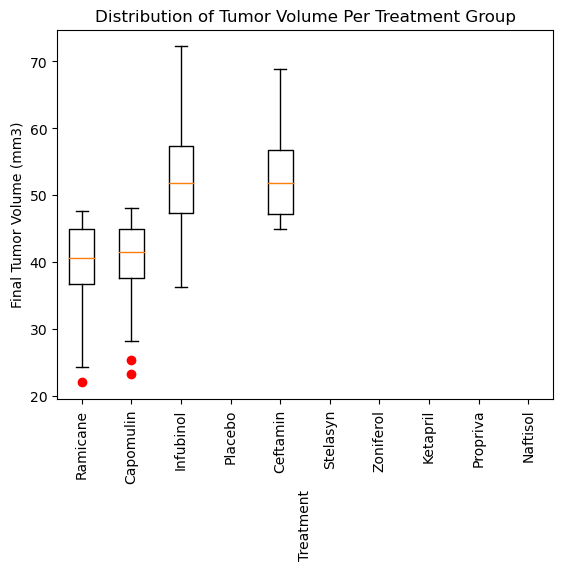

In [92]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

# Create Data Dropping NA Values
merged_data_tumor = merged_data_tumor.dropna() 

# Define Data to Plot
data_to_plot = [merged_data_tumor[merged_data_tumor['Drug Regimen'] == treatment]['Tumor Volume (mm3)'].values
                for treatment in unique_treatments]

# Determine Title, Labeling, & Rotations
plt.boxplot(data_to_plot, labels=unique_treatments, sym='r') 
plt.title('Distribution of Tumor Volume Per Treatment Group')
plt.xticks(rotation = 'vertical')
plt.xlabel('Treatment', rotation = 'vertical')
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

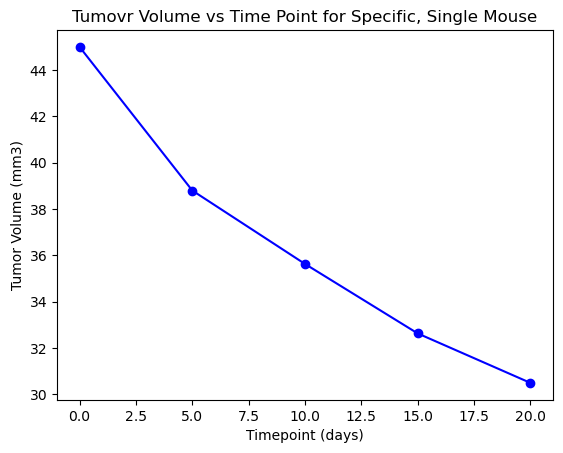

In [94]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_data_for_mouse = df_remove[(df_remove['Drug Regimen'] == 'Capomulin') & (df_remove['Mouse ID'] == 'f966')]

# Specifying Filtered DF to NonEmpty Cell
if not capomulin_data_for_mouse.empty:
  
    # Plot Line Graph
    plt.plot(capomulin_data_for_mouse['Timepoint'], capomulin_data_for_mouse['Tumor Volume (mm3)'], marker='o', linestyle='-', color='b')
    
    # Set labels and Title
    plt.title('Tumovr Volume vs Time Point for Specific, Single Mouse')
    plt.xlabel('Timepoint (days)')
    plt.ylabel('Tumor Volume (mm3)')
       
    # Show the plot
    plt.show()

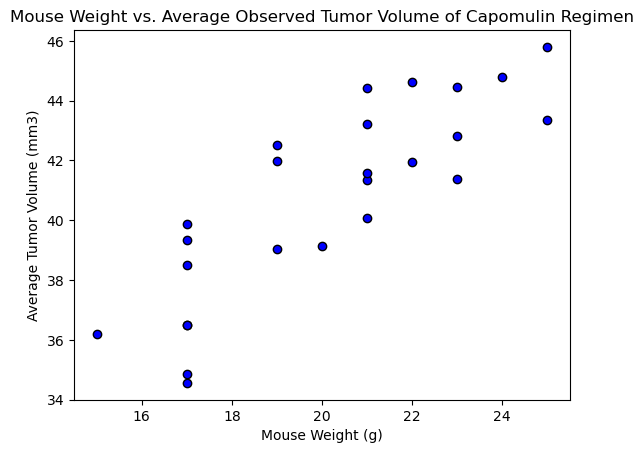

In [98]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = df_remove[df_remove['Drug Regimen'] == 'Capomulin']

# Calculate AVG Tumor Volume
avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Merge Average Tumor Volume with Capomulin Data to get Mouse Weights in Combined Data
merged_capomulin_data = pd.merge(capomulin_data, avg_tumor_volume, on='Mouse ID', suffixes=('_original', '_average'))

# Relevant Column Identification
scatter_data = merged_capomulin_data[['Mouse ID', 'Weight (g)', 'Tumor Volume (mm3)_average']].drop_duplicates()

# Plot Scatter
plt.scatter(scatter_data['Weight (g)'], scatter_data['Tumor Volume (mm3)_average'], marker='o', facecolors='blue', edgecolors='black')

# Set Title & Labeles
plt.title('Mouse Weight vs. Average Observed Tumor Volume of Capomulin Regimen')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

In [37]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen


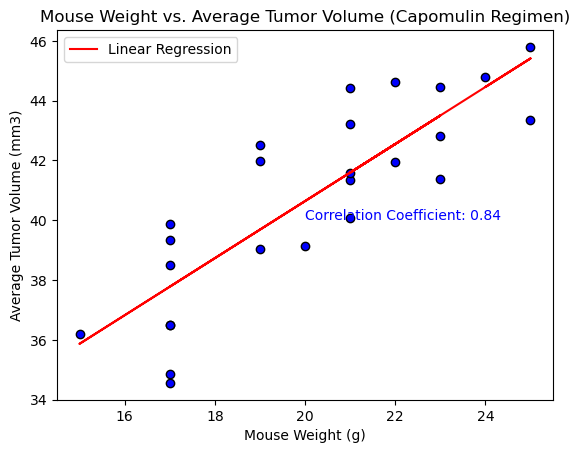

In [102]:
from scipy.stats import linregress

# Identify Relevant Columns for Scatter Plot
scatter_data = merged_capomulin_data[['Mouse ID', 'Weight (g)', 'Tumor Volume (mm3)_average']].drop_duplicates()

# Correlation Coefficient
correlation_coefficient = scatter_data['Weight (g)'].corr(scatter_data['Tumor Volume (mm3)_average'])

# Linear Regression
slope, intercept, r_value, p_value, std_err = linregress(scatter_data['Weight (g)'], scatter_data['Tumor Volume (mm3)_average'])

# Create Linear Regression Line
regression_line = slope * scatter_data['Weight (g)'] + intercept

# Plot Linear Regression Line
plt.plot(scatter_data['Weight (g)'], regression_line, color='red', label='Linear Regression')

# Plot Scatter Plot
plt.scatter(scatter_data['Weight (g)'], scatter_data['Tumor Volume (mm3)_average'], marker='o', facecolors='blue', edgecolors='black')

# Define Labels & Title
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')

# Plot Correlation Coefficient
plt.text(20, 40, f'Correlation Coefficient: {correlation_coefficient:.2f}', color='blue')

# Plot Legend & Graph
plt.legend()
plt.show()